In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/language-popularity/language_popularity.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/language-popularity/language_popularity.csv


In [4]:
#pd.set_option('display.max_rows', df.shape[0]+1)
df = pd.read_csv('/kaggle/input/language-popularity/language_popularity.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [5]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [6]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [7]:
df.shape

(1991, 3)

In [8]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

Calculate the total number of posts per language

In [9]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


How many months of data exist per language

In [10]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


Checking Date

In [11]:
df['DATE'][1]

'2008-08-01 00:00:00'

Find the type of Date

In [12]:
type(df['DATE'][1])

str

Convert Date type using pandas to_datetime()

In [13]:
df.DATE = pd.to_datetime(df.DATE)

In [14]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


Pivoting data so each programming language is a column

In [15]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [16]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [17]:
reshaped_df.shape

(145, 14)

In [18]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [19]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

Count the number of entries per column

In [20]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

Some columns have less data because of NaN values

Replacing NaN values with 0

In [21]:
reshaped_df = reshaped_df.fillna(0)

In [22]:
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

In [23]:
reshaped_df.isna().values.any()

False

In [24]:
df.iloc[50]

DATE     2008-12-01 00:00:00
TAG                       c#
POSTS                   1597
Name: 50, dtype: object

In [25]:
reshaped_df.iloc[50]

TAG
assembly        225.0
c              2533.0
c#            11290.0
c++            4917.0
delphi          385.0
go              130.0
java          11635.0
javascript    11172.0
perl            671.0
php           11030.0
python         5260.0
r              1060.0
ruby           1960.0
swift             7.0
Name: 2012-09-01 00:00:00, dtype: float64

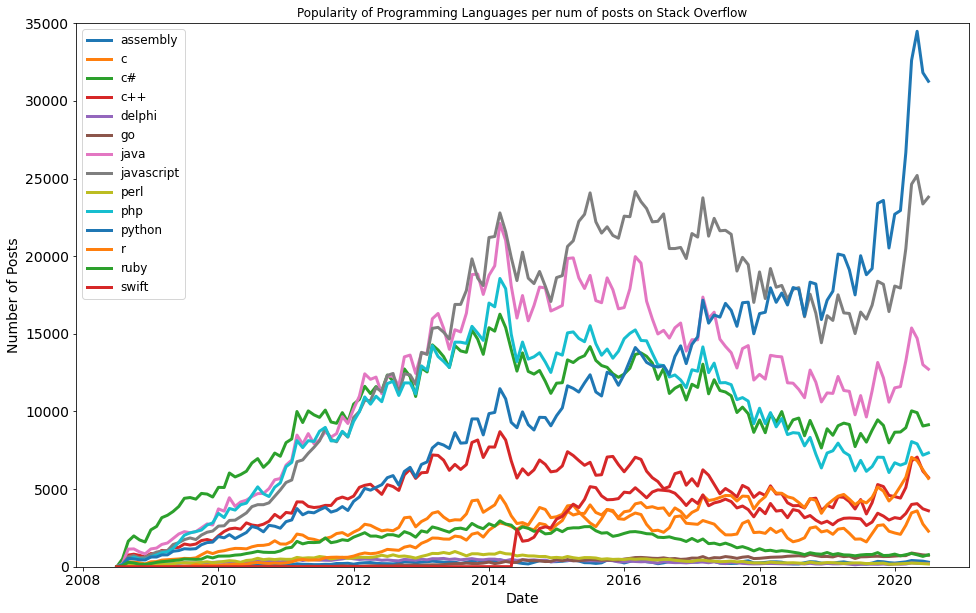

In [26]:
plt.figure(figsize=(16,10))
plt.title("Popularity of Programming Languages per num of posts on Stack Overflow")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=12)

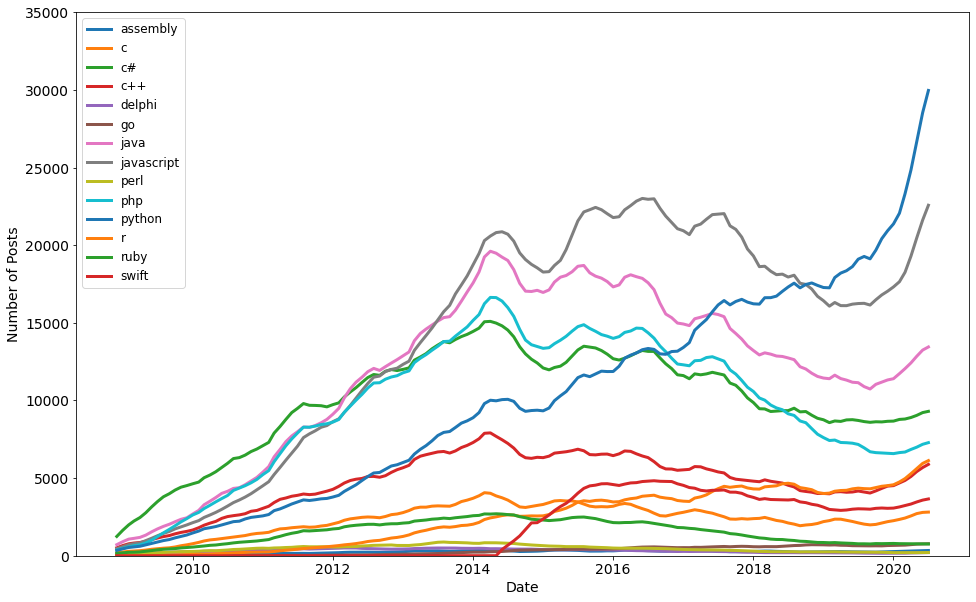

In [27]:
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
for column in reshaped_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=12)

In [28]:
roll_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
roll_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,296.000000,2431.000000,8807.000000,4851.166667,168.666667,687.000000,12050.000000,18252.000000,200.833333,6681.166667,23304.000000,4969.333333,780.000000,3238.000000
2020-04-01,305.500000,2567.000000,8903.500000,5105.333333,183.333333,721.666667,12420.166667,19293.333333,204.833333,6848.333333,24838.500000,5288.000000,771.166667,3332.166667
2020-05-01,316.000000,2716.833333,9040.166667,5421.500000,190.166667,749.500000,12844.500000,20461.500000,203.666667,6993.333333,26653.166667,5614.166667,779.166667,3465.666667
2020-06-01,332.000000,2794.666667,9221.166667,5682.500000,202.000000,766.500000,13246.666667,21616.000000,209.500000,7179.833333,28535.000000,5949.333333,767.833333,3586.166667
2020-07-01,341.833333,2814.166667,9301.166667,5888.333333,207.666667,776.000000,13446.833333,22570.333333,210.833333,7285.666667,29962.000000,6129.333333,760.833333,3659.666667


In [30]:
roll_df.shape

(145, 14)

In [31]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0
